# Data Generation

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# 검증용은 valid_split 비율을 정했다면 요번에는 별도로 뽑아볼 것이다.학습용에서 검증용을 뽑을 것.

### mnist dataset 다운로드

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 생성된 데이터 확인
print(f'학습용 X 데이터의 자료형 : \n{type(X_train)}')

print(f'학습용 Y 데이터의 모양 : \n{type(y_train)}')

print('*'*80)

print(f'학습용 X 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'학습용 Y 데이터의 모양 : \n{y_train.shape}')

print(f'평가용 X 데이터의 모양 : \n{X_test.shape}')

학습용 X 데이터의 자료형 : 
<class 'numpy.ndarray'>
학습용 Y 데이터의 모양 : 
<class 'numpy.ndarray'>
********************************************************************************
학습용 X 데이터의 모양 : 
(60000, 28, 28)
********************************************************************************
학습용 Y 데이터의 모양 : 
(60000,)
평가용 X 데이터의 모양 : 
(10000, 28, 28)


## Data Pre-Processing

In [3]:
## 2차원 배열 --> 3차운 배열

'''
1. reshape((60000, 28, 28, 1)) 함수를 사용
2. 손글씨 이미지의 모양 변경 : 2차원(28, 28) --> 3차원(28, 28, 1)

'''

# 자연어할 때 LSTM(RNN)의 입력을 보면 데이터수는 batch_size를 줘야 결정이 되는데

# 32가 되던 64가 되던 채워지는거고 이제 나머지가 2차원으로 ...

# ( N, 476, 16 ) 이거에 비해서 4차원으로 들어간다...COnv2D의 형식자체가 공식문서 참조했을 때 4차원이다.

X_train = X_train.reshape((60000,28,28,1)) # 전체데이터의 수, 이미지 하나당 28,28 --> 28,28,1로 바꾼다

X_test = X_test.reshape((10000, 28, 28, 1)) # 차원 하나를 늘린다고 변하지 않는다, 일종의 트릭

# 결과 확인
print(f'차원 변환 후 학습용 데이터의 모양 : \n{X_train.shape}')

print('*'*80)

print(f'차원 변환 후 평가용 데이터의 모양 : \n{X_test.shape}')

차원 변환 후 학습용 데이터의 모양 : 
(60000, 28, 28, 1)
********************************************************************************
차원 변환 후 평가용 데이터의 모양 : 
(10000, 28, 28, 1)


In [4]:
### Scaling(normalizing) : 픽셀의 범위를 0과 1사이로 변환

# 넘파이 배열이어서 255로 나눠서 reshape.

X_train = X_train / 255
X_test = X_test / 255

# 결과 확인
print(f'학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_train[0, :, :, :])}, 최솟값 : {np.min(X_train[0, :, :, :])}')

print('*'*80)

print(f'평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : {np.max(X_test[0,:,:,:])}, 최솟값 : {np.min(X_test[0, :, :, :])}')

# 검증용을 반드시 만들 필요는 없다.

# 전처리 끝.


학습용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0
********************************************************************************
평가용 X 데이터의 첫번째 이미지 픽셀의 최댓값 : 1.0, 최솟값 : 0.0


## 학습용 / 검증용 데이터 생성

In [5]:
'''
1. train_test_split() 함수를 사용
2. 학습용 데이터의 일부를 검증용 데이터로 분할
'''

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, #validation_split=0.2 쓰면되는데.. 이렇게 쓰는 사람도 있다.
                 random_state=0)

# 결과 확인

print(f'학습용 X 데이터의 모양 : {X_train.shape}')

print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')

학습용 X 데이터의 모양 : (48000, 28, 28, 1)
********************************************************************************
검증용 X 데이터의 모양 : (12000, 28, 28, 1)


## CNN Model Generation

In [22]:
### 모델 생성도 2가지 방법이 있음.
# 1. 사용자 정의 함수
    ### 모델 생성함수 정의

def create_model():
    # 모델 구조 정의하기
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
    # 첫번째 입력받는 Conv2D는 지정해서 오류를 내지않게 막아준다.
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model
    
    
# 1 모델 구조 정의
# 2 컴파일(compile) 어떤 손실함수로 최적화할거며.. 정해져야 한다

# 책에서는 Dense Layer를 두번 사용함. Dense Layer와 Dense Layer사이에 dropout을 넣는다. Dense layer를 여러번 쓸 경우..

In [24]:
### 모델의 구조 확인

# 모델 생성 함수 호출, 모델 생성

cnn = create_model()

# model.summary() 함수 사용

cnn.summary()

# 18496은 어떻게 나오느냐..

# 32*9+1*64=18496

# +1은 y절편. 289필터가 64개가 있다.. 가중치의 숫자가 18496.

# flatten -> Dense도 3136+1(절편)*10행 = 31370

# 시드 설정을 안해서 값은 개개인마다 다 다를 것이다.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [25]:
### 학습이 되지 않은 모델의 가중치 확인 --> 0에 가까운 실수
print(cnn.weights) #학습에 의해서 가중치가 변해간다..는걸 알면 된다.

[<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.02101378,  0.03563501,  0.06802256,  0.09617639,
           0.1190549 , -0.00667632, -0.02931949,  0.06735454,
          -0.11344266,  0.10949601,  0.0891511 , -0.01056045,
           0.0171802 ,  0.06149739,  0.08646162, -0.05486046,
           0.016342  , -0.05513955,  0.02700354,  0.13322137,
           0.00984542, -0.03536907,  0.08356622, -0.10435364,
          -0.05229993, -0.07283851,  0.03925659, -0.12271369,
           0.01519115,  0.02441135, -0.08899148, -0.04572988]],

        [[-0.00056148,  0.06025885, -0.08993992, -0.12342258,
           0.03244354, -0.13958582,  0.0181462 ,  0.03439698,
          -0.09560609, -0.13161618,  0.00765559, -0.10010098,
           0.11433949, -0.01659274,  0.04828122,  0.05115274,
          -0.1082987 , -0.10172004,  0.06978427, -0.06056024,
          -0.09230994,  0.01716194,  0.0738394 ,  0.12227981,
          -0.12362157, -0.05983302, -0.13127232,  0.1

# Model Learning

In [ ]:
## model 컴파일(compile)
#- 개념 : 손실 함수 정의 + 최적화 함수 --> 모델 완성
#- 손실 함수 : 모델이 계산한 예측과 정답(label)을 비교하여 손실(loss)을 계산
#- 학습 : 경사하강법 --> 손실을 최소화하는 가중치 획득

#**손실 함수 외우자! ** 
#이진 분류(binary classification)
#tf.keras.losses.BinaryCrossentrypo
#model.compile(loss='binary_crossentropy')
#
#- 0일 확률이 30이고 1일 확률이 70이야
#
#다중분류(multi classification)
#1. tf.keras.losses.CategoricalCrossentropy() : 
#label --> One-Hot Encoding 
#model.compile(loss='categorical_crossentropy')
#
#2. tf.keras.losses.SparseCategoricalCrossentropy() :
#label --> 정수 인코딩
#model.compile(loss='sparse_categorical_crossentropy')

#최적화
#-최적화 함수
#1 tf.keras.optimizers.Adam(learning_rate)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc]'))
#2 pdf참조


In [27]:
### 모델 컴파일 --> 손실 함수 정의 + 가중치 최적화 방식 + 검증용 데이터 평가 방식 --> 모델 완성
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])

In [28]:
### 모델 학습 --> LSTM과는 달리 학습의 결과물을 저장할 수 있음
history = cnn.fit(x=X_train,
                  y=y_train,
                  batch_size=64,
                  epochs=10, #학습횟수
                  validation_data=(X_val, y_val))#데이터를 직접 넣어줄 것이다.

# 과적합일어날 때 멈추고 싶을 때 callback을 하면됨. tf.keras.callbacks.EarlyStopping, patience 몇번까지 참아줄것인가, 이후 학습중지

# tf.keras.callback.modelCheckpoint 저장의 조건을 설정

Epoch 1/10


750/750 [==============================] - 15s 18ms/step - loss: 0.2271 - accuracy: 0.9311 - val_loss: 0.0810 - val_accuracy: 0.9731
Epoch 2/10
750/750 [==============================] - 13s 18ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0492 - val_accuracy: 0.9843
Epoch 3/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0441 - val_accuracy: 0.9853
Epoch 4/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0431 - val_accuracy: 0.9859
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0394 - val_accuracy: 0.9876
Epoch 6/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 7/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0472 - val_accurac

## 학습 결과 시각화(Visualization)

In [35]:
### 학습의 결과물 저장 변수 history 확인
print(history)
print('*'*80)
print(type(history.history))
print('*'*80)
print(history.history)
print('*'*80)


********************************************************************************
<class 'dict'>
********************************************************************************
{'loss': [0.2271115779876709, 0.06508064270019531, 0.04710904508829117, 0.03701412305235863, 0.029216688126325607, 0.024645855650305748, 0.020599115639925003, 0.015851030126214027, 0.014337114058434963, 0.011732044629752636], 'accuracy': [0.9311249852180481, 0.9804791808128357, 0.9853125214576721, 0.9887708425521851, 0.9905833601951599, 0.992520809173584, 0.9933750033378601, 0.995520830154419, 0.9954166412353516, 0.9963333606719971], 'val_loss': [0.0809691846370697, 0.0491979718208313, 0.0441146120429039, 0.04305544123053551, 0.0393989235162735, 0.0423237569630146, 0.04722152650356293, 0.054038599133491516, 0.04009539633989334, 0.041949499398469925], 'val_accuracy': [0.9730833172798157, 0.984333336353302, 0.9853333234786987, 0.9859166741371155, 0.987583339214325, 0.9864166378974915, 0.9855833053588867, 0.9858333

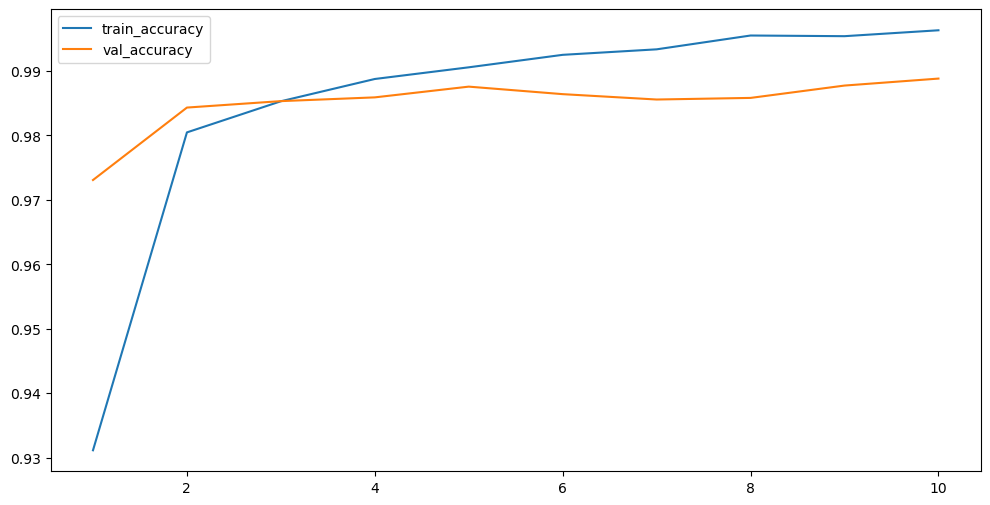

In [56]:
### 학습 결과 시각화(1) - loss

# plt 기본값 6.4 4.8

plt.figure(figsize=(12,6))
x = np.arange(1,11)
plt.plot(x, history.history['accuracy'], label='train_accuracy')
plt.plot(x, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# 검증용 또는 평가용 기준으로.... train_loss val_loss로 바꿔서 해볼 것 